In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings

In [2]:
crypto = pd.read_csv("consolidated_coin_data.csv")

In [3]:
crypto.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,4-Dec-19,1.29,1.32,1.25,1.25,46048752.0,824588509.0
1,tezos,3-Dec-19,1.24,1.32,1.21,1.29,41462224.0,853213342.0
2,tezos,2-Dec-19,1.25,1.26,1.20,1.24,27574097.0,817872179.0
3,tezos,1-Dec-19,1.33,1.34,1.25,1.25,24127567.0,828296390.0
4,tezos,30-Nov-19,1.31,1.37,1.31,1.33,28706667.0,879181680.0


In [4]:
# Understanding how many rows in dataset
crypto.shape[0]

28944

In [5]:
# understanding how many columns in dataset
crypto.shape[1]

8

In [6]:
# Finding missing data
missing_data = crypto.isnull()
missing_data.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False


In [7]:
# Count missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Currency
False    28944
Name: Currency, dtype: int64

Date
False    28944
Name: Date, dtype: int64

Open
False    28944
Name: Open, dtype: int64

High
False    28944
Name: High, dtype: int64

Low
False    28944
Name: Low, dtype: int64

Close
False    28944
Name: Close, dtype: int64

Volume
False    28944
Name: Volume, dtype: int64

Market Cap
False    28944
Name: Market Cap, dtype: int64



In [8]:
crypto['date'] = pd.to_datetime(crypto['Date'])

In [9]:
crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Currency    28944 non-null  object        
 1   Date        28944 non-null  object        
 2   Open        28944 non-null  float64       
 3   High        28944 non-null  float64       
 4   Low         28944 non-null  float64       
 5   Close       28944 non-null  float64       
 6   Volume      28944 non-null  float64       
 7   Market Cap  28944 non-null  float64       
 8   date        28944 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.0+ MB


In [10]:
crypto.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap,date
0,tezos,4-Dec-19,1.29,1.32,1.25,1.25,46048752.0,824588509.0,2019-12-04
1,tezos,3-Dec-19,1.24,1.32,1.21,1.29,41462224.0,853213342.0,2019-12-03
2,tezos,2-Dec-19,1.25,1.26,1.20,1.24,27574097.0,817872179.0,2019-12-02
3,tezos,1-Dec-19,1.33,1.34,1.25,1.25,24127567.0,828296390.0,2019-12-01
4,tezos,30-Nov-19,1.31,1.37,1.31,1.33,28706667.0,879181680.0,2019-11-30


In [11]:
crypto = crypto.drop(['Date'], axis = 1)

In [12]:
crypto = crypto.sort_values(by=['date'])

In [13]:
crypto.set_index('date',inplace = True)

In [14]:
crypto.info()
crypto.astype({'Close':float})

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28944 entries, 2013-04-28 to 2019-12-04
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Open        28944 non-null  float64
 2   High        28944 non-null  float64
 3   Low         28944 non-null  float64
 4   Close       28944 non-null  float64
 5   Volume      28944 non-null  float64
 6   Market Cap  28944 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.8+ MB


,Currency,Open,High,Low,Close,Volume,Market Cap
date,,,,,,,
2013-04-28,xrp,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09
2013-04-28,cardano,4.30,4.40,4.18,4.35,0.000000e+00,7.463694e+07
2013-04-28,ethereum,135.30,135.98,132.10,134.21,0.000000e+00,1.488567e+09
2013-04-28,litecoin,4.30,4.40,4.18,4.35,0.000000e+00,7.463694e+07
2013-04-28,stellar,4.30,4.40,4.18,4.35,0.000000e+00,7.463694e+07
...,...,...,...,...,...,...,...
2019-12-04,ethereum,147.92,150.68,145.00,146.75,7.865937e+09,1.596616e+10
2019-12-04,bitcoin-cash,212.68,216.60,205.89,209.29,1.441055e+09,3.798515e+09
2019-12-04,stellar,0.06,0.06,0.05,0.06,2.077892e+08,1.111416e+09


In [15]:
crypto_new = crypto[crypto['Currency'] == "bitcoin"]

In [16]:
crypto_new.head()

,Currency,Open,High,Low,Close,Volume,Market Cap
date,,,,,,,
2013-04-28,bitcoin,135.30,135.98,132.10,134.21,0.0,1.488567e+09
2013-04-29,bitcoin,134.44,147.49,134.00,144.54,0.0,1.603769e+09
2013-04-30,bitcoin,144.00,146.93,134.05,139.00,0.0,1.542813e+09
2013-05-01,bitcoin,139.00,139.89,107.72,116.99,0.0,1.298955e+09
2013-05-02,bitcoin,116.38,125.60,92.28,105.21,0.0,1.168517e+09


In [17]:
crypto_new['9-day'] =crypto_new['Close'].rolling(9).mean()
crypto_new['21-day'] =crypto_new['Close'].rolling(21).mean()
crypto_new['15-day'] =crypto_new['Close'].rolling(15).mean()
crypto_new['Change'] =np.log(crypto_new.Close/crypto_new.Close.shift())


C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

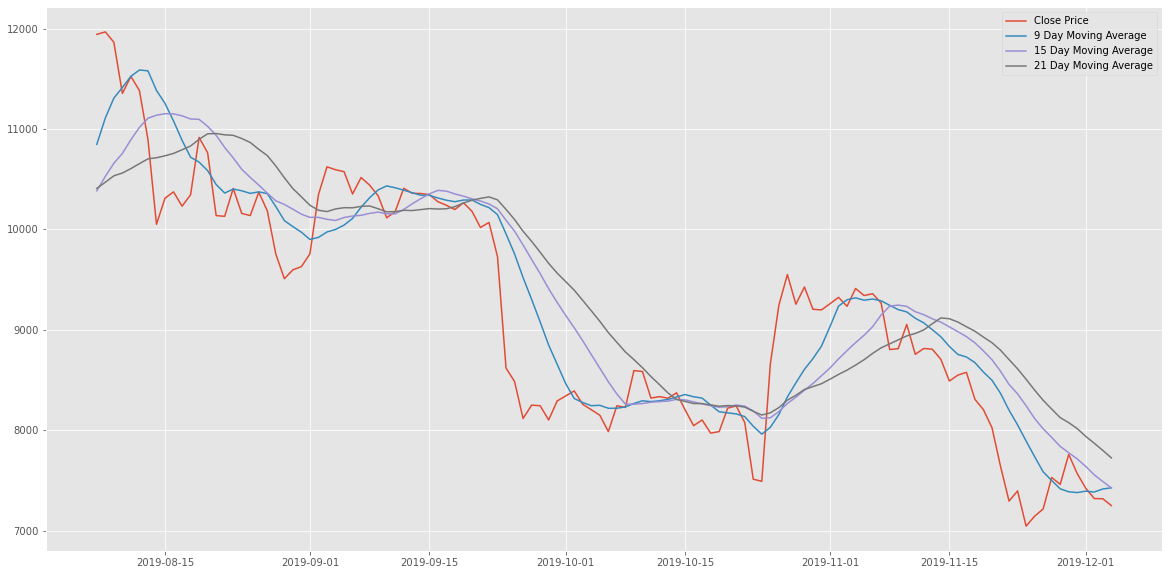

In [18]:
with plt.style.context('ggplot'):
    plt.figure(figsize = (20,10))
    plt.plot(crypto_new.Close[-120:], label = 'Close Price')
    plt.plot(crypto_new['9-day'][-120:], label = '9 Day Moving Average')
    plt.plot(crypto_new['15-day'][-120:], label = '15 Day Moving Average')
    plt.plot(crypto_new['21-day'][-120:], label = '21 Day Moving Average')
    plt.legend(loc =1)
    

In [19]:
crypto_eth = crypto[crypto['Currency'] == "ethereum"]

In [20]:
crypto_eth['9-day'] =crypto_eth['Close'].rolling(9).mean()
crypto_eth['21-day'] =crypto_eth['Close'].rolling(21).mean()
crypto_eth['15-day'] =crypto_eth['Close'].rolling(15).mean()
crypto_eth['Change'] =np.log(crypto_eth.Close/crypto_eth.Close.shift())

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

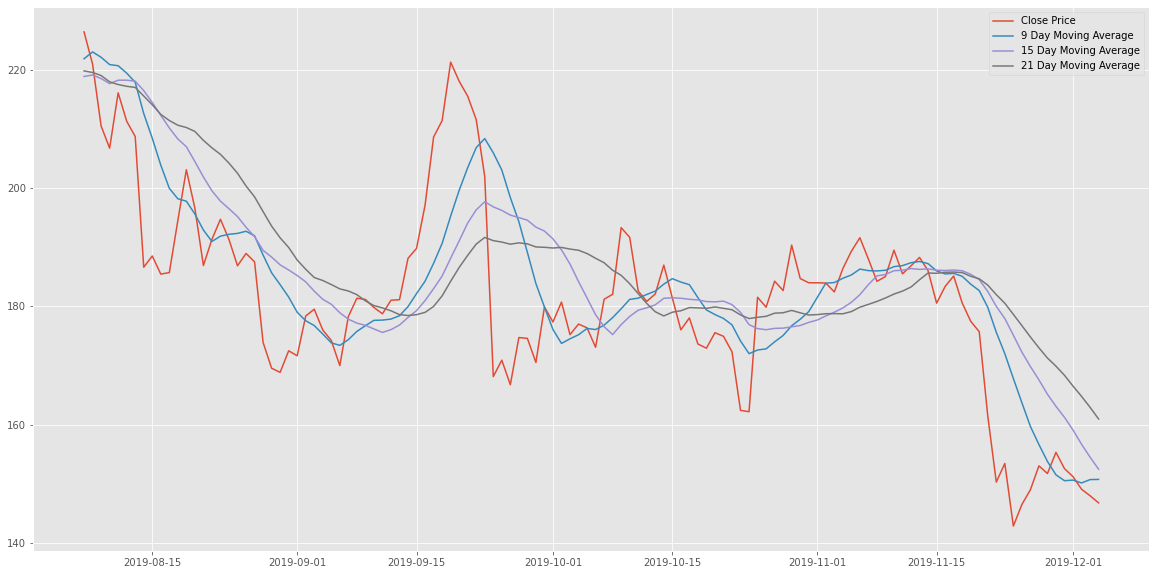

In [21]:
with plt.style.context('ggplot'):
    plt.figure(figsize = (20,10))
    plt.plot(crypto_eth.Close[-120:], label = 'Close Price')
    plt.plot(crypto_eth['9-day'][-120:], label = '9 Day Moving Average')
    plt.plot(crypto_eth['15-day'][-120:], label = '15 Day Moving Average')
    plt.plot(crypto_eth['21-day'][-120:], label = '21 Day Moving Average')
    plt.legend(loc =1)

In [22]:
crypto_xrp = crypto[crypto['Currency'] == "xrp"]

In [23]:
crypto_xrp['9-day'] =crypto_xrp['Close'].rolling(9).mean()
crypto_xrp['21-day'] =crypto_xrp['Close'].rolling(21).mean()
crypto_xrp['15-day'] =crypto_xrp['Close'].rolling(15).mean()
crypto_xrp['Change'] =np.log(crypto_xrp.Close/crypto_xrp.Close.shift())

C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\patel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

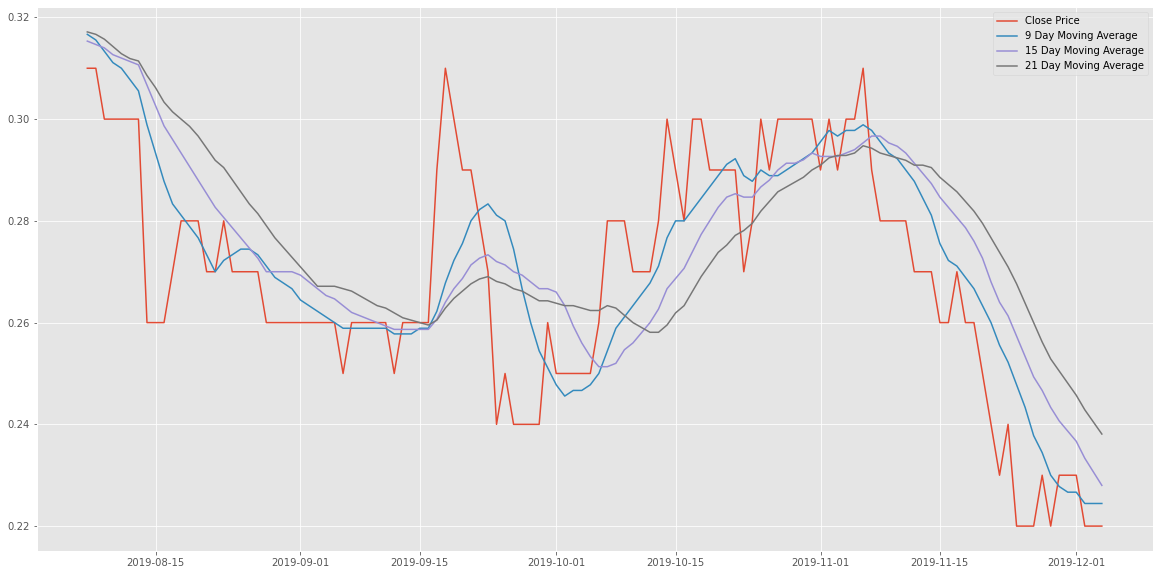

In [24]:
with plt.style.context('ggplot'):
    plt.figure(figsize = (20,10))
    plt.plot(crypto_xrp.Close[-120:], label = 'Close Price')
    plt.plot(crypto_xrp['9-day'][-120:], label = '9 Day Moving Average')
    plt.plot(crypto_xrp['15-day'][-120:], label = '15 Day Moving Average')
    plt.plot(crypto_xrp['21-day'][-120:], label = '21 Day Moving Average')
    plt.legend(loc =1)

In [25]:
# Define SES
def simple_exp_smooth(d,extra_periods,alpha=0.4):  


  d = np.array(d)  # Transform the input into a numpy array  

  cols = len(d)  # Historical period length  

  d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  



  f = np.full(cols+extra_periods,np.nan)  # Forecast array  

  f[0] = d[0]  # initialization of first forecast  

    

  # Create all the t+1 forecasts until end of historical period  

  for t in range(1,cols+1):  

    f[t] = alpha*d[t-1]+(1-alpha)*f[t-1]  
    f[cols+1:] = f[t]  # Forecast for all extra periods  


  df = pd.DataFrame.from_dict({"Close":d,"Close_Forecast":f,"Error":f-d}) 
  return df


In [26]:
d = crypto[crypto['Currency'] == "bitcoin"]

In [27]:
d = d.drop(['Currency','Open','High','Low','Volume','Market Cap'], axis = 1)

In [28]:
df = simple_exp_smooth(d,2,1.0)
df

,Close,Close_Forecast,Error
0,134.21,134.21,0.00
1,144.54,134.21,-10.33
2,139.00,144.54,5.54
3,116.99,139.00,22.01
4,105.21,116.99,11.78
...,...,...,...
2409,7321.99,7424.29,102.30
2410,7320.15,7321.99,1.84
2411,7252.03,7320.15,68.12
2412,NaN,7252.03,NaN


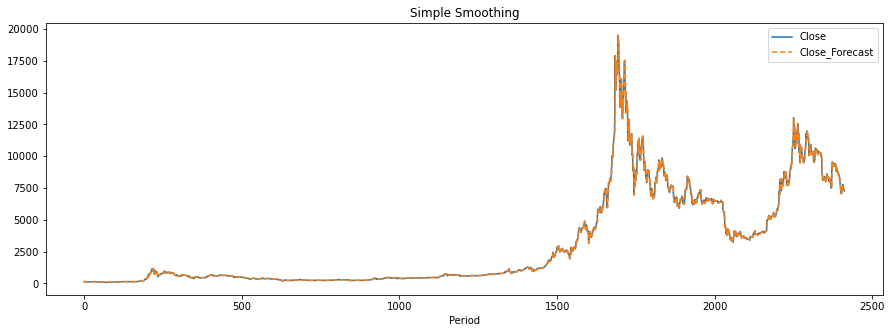

In [29]:
# Plot the Time Series
df.index.name = "Period"
df[["Close","Close_Forecast"]].plot(figsize=(15,5),title="Simple Smoothing",style=["-","--"])  
plt.show()

In [30]:
# Calculate MAE and RMSE
MAE = df["Error"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df["Error"]**2).mean())
print("RMSE:",round(RMSE,2))

MAE: 96.25
RMSE: 249.22


In [31]:
# Define DES

def double_exp_smooth(d,extra_periods,alpha,beta):  

    d = np.array(d)  # Transform the input into a numpy array  
    cols = len(d)  # Historical period length  
    d = np.append(d,[np.nan]*extra_periods)  # Append np.nan into the demand array to cover future periods  
# Creation of the level, trend, and forecast arrays
    f= np.full(cols+extra_periods,np.nan)  # Forecast array  
    a = np.full(cols+extra_periods,np.nan)
    b = np.full(cols+extra_periods,np.nan)
# Level and trend initialization 
    a[0] = d[0]
    b[0] = d[1] -d[0]

    
  # Create all the t+1 forecasts until end of historical period  

    for t in range(1,cols):  
        f[t] = a[t-1]+ b[t-1]
        a[t] = alpha*d[t] + (1-alpha)*(a[t-1] + b[t-1])
        b[t] = beta*(a[t] - a[t-1]) + (1-beta)* b[t-1]

# Forecast for all extra periods  
    for t in range(cols, cols+extra_periods):
        f[t] = a[t-1] + b[t-1]
        a[t] = f[t]
        b[t] = b[t-1]


    df = pd.DataFrame.from_dict({"Demand":d,"Forecast":f,"Level": a, "Trend": b, "Error":f-d}) 
    return df


In [32]:
df = double_exp_smooth(d,2,1,0.01)

In [33]:
# Calculate MAE and RMSE
MAE = df["Error"].abs().mean()  
print("MAE:",round(MAE,2)) 
RMSE = np.sqrt((df["Error"]**2).mean())
print("RMSE:",round(RMSE,2))

MAE: 96.44
RMSE: 249.95


In [ ]:
# by this we can conclude that